## 1. Load data

In [1]:
import glob
import os

import numpy as np
from matplotlib import pyplot as plt
from obspy import UTCDateTime

freq0 = 1.
corr_len = 2
std_model = 0.012

infile = glob.glob(
    f'/home/pm/Documents_sync/PhD/StHelens/spatial/synthetic_test_dvfilt_allcc_cl{corr_len}_std{std_model}_largemap/{freq0}-{freq0*2}/dvdt_3D.npz')[0]


outfolder = os.path.join(os.path.dirname(os.path.dirname(infile)), 'figures')
os.makedirs(outfolder, exist_ok=True)

loaded = np.load(infile)

x = loaded['xaxis']
y = loaded['yaxis']
t = loaded['taxis']
dvdt = loaded['dv']
statx = loaded['statx']
staty = loaded['staty']
# No data anymore from this date on
start = 0  # 4 for february # Start here for February
start = np.argmin(abs(t - UTCDateTime('2007-06-01').timestamp))
end = -1
# note that this are rows -> latitude, columns -> longitude, pages -> time
dvdt = dvdt[:,:,start:]
t = t[start:]

dv_total = dvdt[:, :, -1]
dv = np.nan_to_num(dvdt)

utcs = [UTCDateTime(tt) for tt in t]
datetimes = [utci.datetime for utci in utcs]


In [2]:
from obspy.geodetics import degrees2kilometers, locations2degrees
from seismic.monitor.spatial import geo2cart

lat = [46.05, 46.36]
lon = [-122.45, -122.03]


# Y-extent
y2 = degrees2kilometers(lat[1]- lat[0])

# X-Extent
x2 = degrees2kilometers(locations2degrees(lat[0], lon[0], lat[0], lon[1]))
chkb2 = np.zeros_like(dv_total)
for ii, yy in enumerate(np.arange(y2+1)):
    chkb2[ii, :] = np.sin(
        4*np.pi*np.arange(x2/1+1)/(x2/1)) + np.cos(4*np.pi*yy/(y2))


# also plot MSH
MSH = [46.19113335236592, -122.19448731767436]
msh_x, msh_y = geo2cart(MSH[0], MSH[1], lat[0])

In [3]:
print(statx, staty)
print(max(statx))

[-8320.05094253 -8328.06618681 -8313.73268435 -8318.66788456
 -8318.7251153  -8322.08468368 -8318.04105947 -8322.59910063
 -8320.44255633] [5134.34567747 5136.78529416 5127.98977546 5136.89092934 5131.31895156
 5141.38765217 5142.08239807 5136.49841125 5138.26741133]
-8313.73268434644


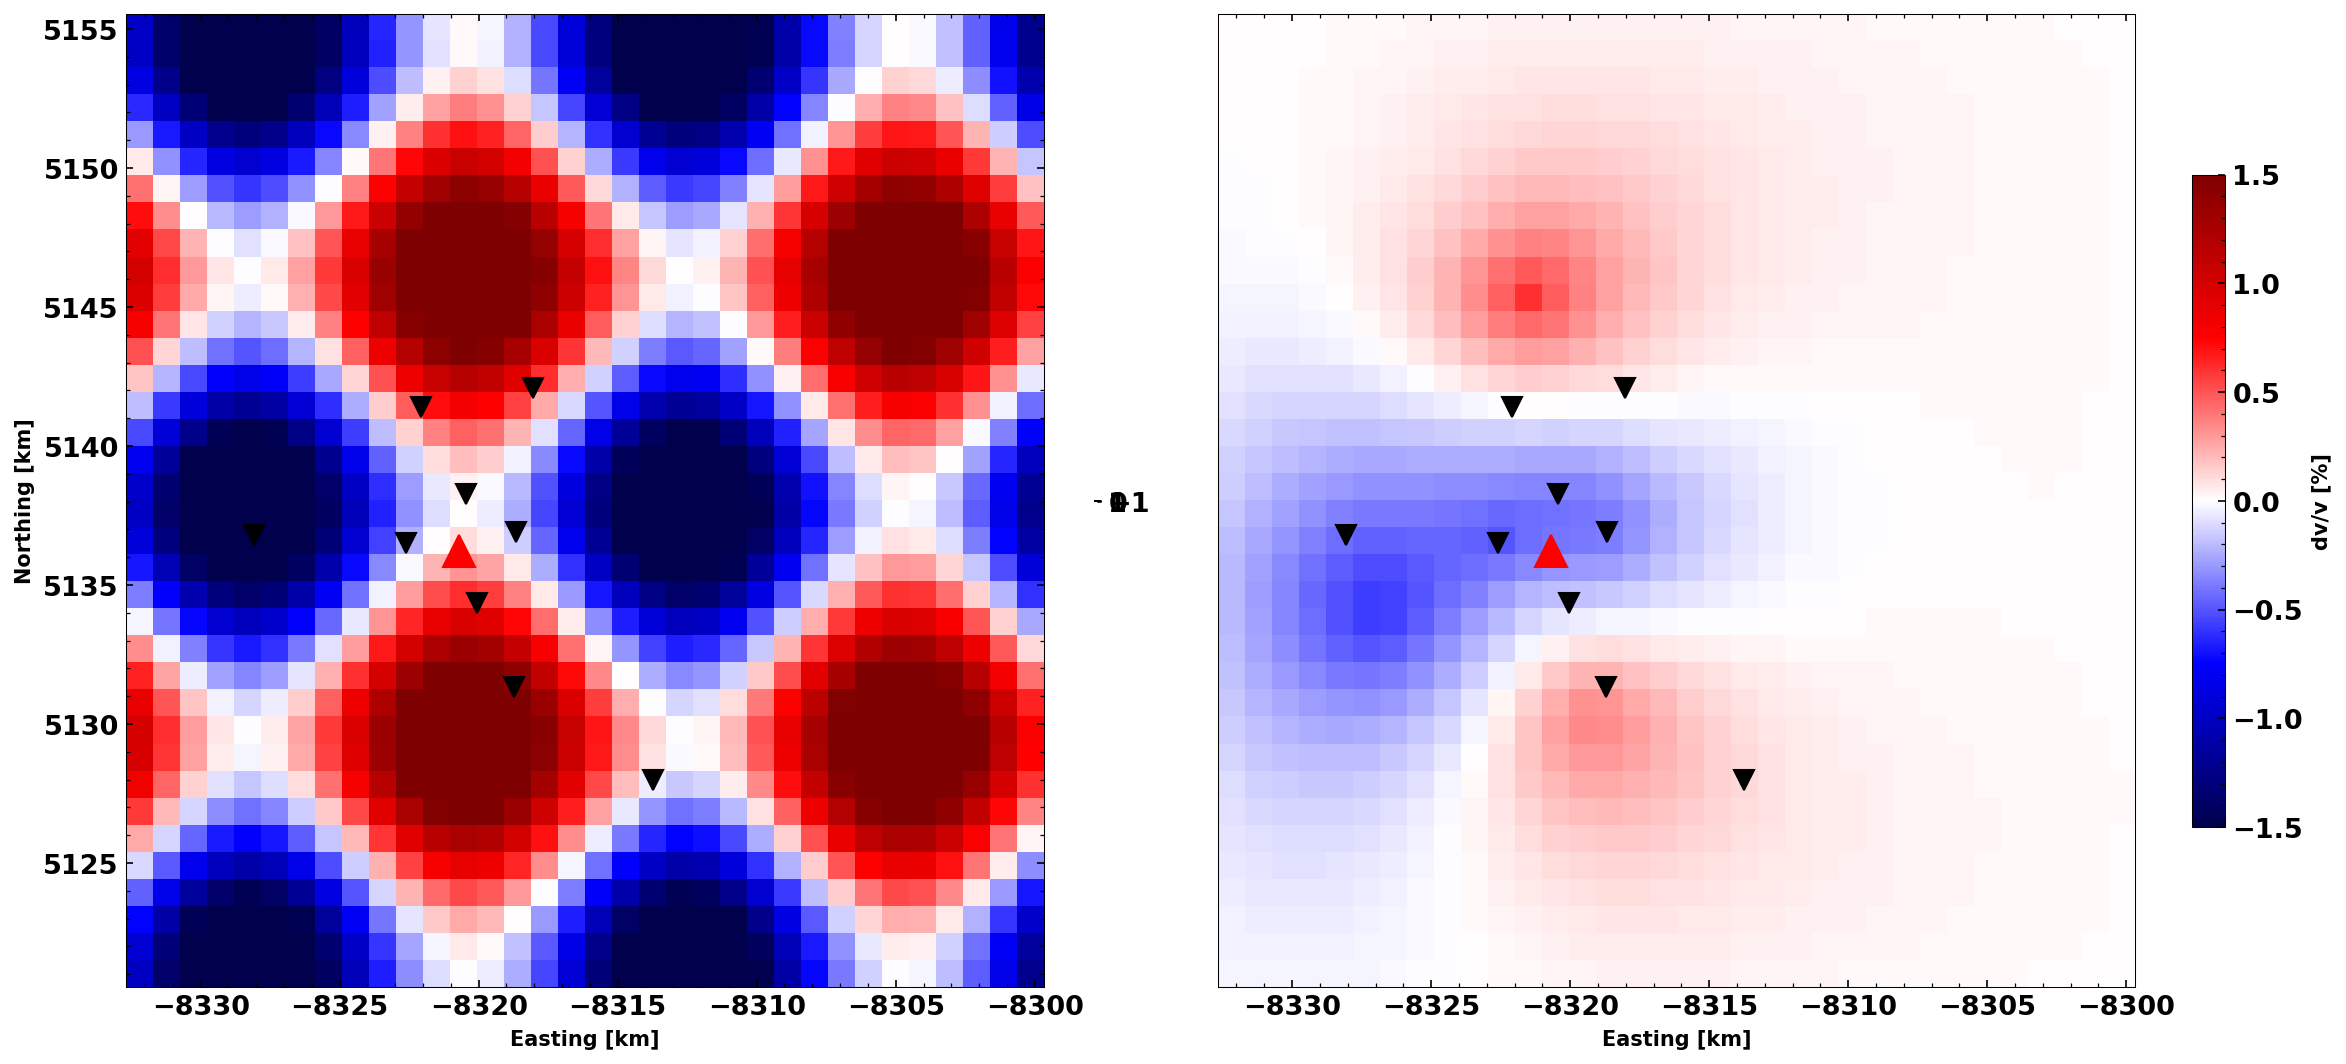

In [5]:
# show synthetic model


from seismic.plot.plot_utils import set_mpl_params
set_mpl_params()

plt.figure(figsize=(16, 9))
plt.subplot(121)
plt.imshow(-chkb2, cmap='seismic', vmin=-1.5, vmax=1.5, origin='lower', extent=[x[0], x[-1], y[0], y[-1]])
ax0 = plt.gca()
plt.plot(statx, staty, 'kv', ms=10)
plt.plot(msh_x, msh_y, 'r^', ms=15)

# share y-axis with the other plot
plt.ylabel('Northing [km]')
plt.xlabel('Easting [km]')
plt.colorbar(shrink=0.)
# don't show colorbar

plt.subplot(122, sharey=ax0)
plt.imshow(dv[:,:,-61]*-100, cmap='seismic', vmin=-1.5, vmax=1.5, origin='lower', extent=[x[0], x[-1], y[0], y[-1]])
plt.plot(statx, staty, 'kv', ms=10)
plt.plot(msh_x, msh_y, 'r^', ms=15)
# don't show y axis
plt.gca().yaxis.set_visible(False)
# both subplots should have the same size
# plt.tight_layout()
plt.colorbar(label='dv/v [%]', shrink=0.5)
plt.xlabel('Easting [km]')
plt.tight_layout()
plt.savefig(os.path.join(outfolder, 'synthetic_model.png'), dpi=300, bbox_inches='tight', transparent=True)

